# MD004 ENTREGA8 NAIVE BAYES & ANÁLISIS DE SENTIMIENTO


###### **Trabajo del Tema 8**

**Descripción de la tarea:**

El csv adjunto incluye reviews que han dejado usuarios en la Google Play Store en referencia a 23 apps, incluyendo una valoración categórica sobre el análisis de sentimiento. Los datos son los siguientes:

- package_name: Nombre de la app
- review: Texto del usuario con la review
- polarity: Sentimiento de polaridad de la review:
    - 1: Review con un sentimiento muy positivo o muy negativo
    - 0: Review con un sentimiento neutro (-->realizo una pequeña corrección, el enunciado ponía '2')

**Se pide:**

1. **Limpieza de instancias (3.5p)**: Limpieza de texto de las instancias. Se valorará el uso de las técnicas empleadas y las explicaciones en el notebook
2. **Creación de modelo clasificador de Naive Bayes (3.5p)**: Se valorará el uso de técnicas empleadas como el split entre entrenamiento y validación y selección de métrica de optimización
3. **Optimización del modelo (2p)**: En base a los resultados obtenidos, ¿Somos capaces de mejorar nuestro modelo? Se valorará el uso de ténicas como Laplace smoothing, uso de 
la variable categórica package_name
4. **Conclusiones y vías abiertas (1p)**: ¿Qué resultados obtenemos en el modelo?, ¿Predice correctamente?, ¿En todas las apps?, ¿Qué datos podrían ayudarnos a mejorar la predicción?

**>> este ejercicio no tiene una solución única<<** Muchas opciones pueden ser válidas, pero se espera que se haga una interpretación de los datos obtenidos en todos los puntos y que se construya un modelo de Naive Bayes acorde a lo analizado (Si la clasificación es válida, por qué lo es y si no llega a serlo, por qué no lo es y cómo podrían mejorarse los resultados)

<font color='red'> **Entrega: fichero Jupyter Notebook con MD004NombreApellidosAC08.ipynb y fichero .pdf con MD004NombreApellidosAC08.pdf** </font>

In [11]:
library(tidyverse)
library(caret)
library(ggplot2)
library(gridExtra)
#install.packages('GGally', dependencies=TRUE, repos="https://CRAN.R-project.org/")
library(GGally)
#install.packages('FSelectorRcpp', dependencies=TRUE)
library(FSelectorRcpp)

library(e1071)
#install.packages('tm', dependencies=TRUE)
library(tm)
library(SnowballC)
#install.packages('wordcloud', dependencies=TRUE)
library(wordcloud)
#install.packages('gmodels', dependencies=TRUE)
library(gmodels)


also installing the dependencies ‘caTools’, ‘nloptr’, ‘gdata’, ‘gplots’, ‘gtools’, ‘lme4’


Warning message in install.packages("gmodels", dependencies = TRUE):
“installation of package ‘nloptr’ had non-zero exit status”
Warning message in install.packages("gmodels", dependencies = TRUE):
“installation of package ‘lme4’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



### Lectura y exploracion de los datos

In [4]:
data = read.csv(file='sentiment_dataset.csv', header=TRUE, sep=',', dec='.')

In [5]:
str(data)

'data.frame':	891 obs. of  3 variables:
 $ package_name: chr  "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" ...
 $ review      : chr  " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen"| __truncated__ " messenger issues ever since the last update, initial received messages don't get pushed to the messenger app a"| __truncated__ " profile any time my wife or anybody has more than one post and i view them it would take me to there profile s"| __truncated__ " the new features suck for those of us who don't have a working back button can you guys make the videos able t"| __truncated__ ...
 $ polarity    : int  0 0 0 0 0 0 0 0 0 0 ...


In [6]:
summary(data)

 package_name          review             polarity     
 Length:891         Length:891         Min.   :0.0000  
 Class :character   Class :character   1st Qu.:0.0000  
 Mode  :character   Mode  :character   Median :0.0000  
                                       Mean   :0.3446  
                                       3rd Qu.:1.0000  
                                       Max.   :1.0000  

El dataset cuenta con 3 variables, una de las cuales es categorica, una binaria definiendo el sentimiento del review y la restante con el contenido del review

In [12]:
head(data)

,package_name,review,polarity
,<chr>,<chr>,<int>
1,com.facebook.katana,privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online.,0
2,com.facebook.katana,"messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens messenger. subsequent messages go through messenger app, unless you close the chat head... then you start over with no notification and having to go through the facebook app.",0
3,com.facebook.katana,profile any time my wife or anybody has more than one post and i view them it would take me to there profile so that i can view them all at once. now when i try to view them it tells me that the page that i requested is not available. i've restarted my phone i even cleard the cache and i've uninstalled and reinstalled the app and it is still doing it. please fix it thank you,0
4,com.facebook.katana,the new features suck for those of us who don't have a working back button can you guys make the videos able to be slid to the left to exit the video. as i have to force close facebook to exit,0
5,com.facebook.katana,"forced reload on uploading pic on replying comment last night i tried to reply a comment by uploading a photo from my phone. when i press on the button to select photos the app automatically goes back to the main page. on other occasions, i could enter to my gallery to select my image but as soon as i selected an image and press done, the program, again, forced reload and suddenly go back to the main page. please fix this and i will change my rating. thank you.",0
6,com.facebook.katana,"idk i can't edit my posts? things such as my profile picture, when i edit it, it becomes grey and says that it is no longer available. please fix. i have an htc desire. will rate 5 stars shown fixed đ",0


Lo primero que haré para la limpieza de los datos sera determinar si hay algún NA en ellos.

In [13]:
sum(is.na(data))

[1] 0

In [15]:
round(prop.table(table(data$package_name))*100, digits = 1)


        com.android.chrome        com.dropbox.android 
                       4.4                        4.5 
              com.evernote        com.facebook.katana 
                       4.5                        4.5 
         com.facebook.orca    com.google.android.talk 
                       4.5                        4.4 
         com.hamrokeyboard             com.hamropatro 
                       4.4                        4.3 
     com.imangi.templerun2    com.king.candycrushsaga 
                       4.5                        4.5 
      com.linkedin.android      com.opera.mini.native 
                       4.5                        4.5 
      com.rovio.angrybirds    com.shirantech.kantipur 
                       4.4                        4.0 
                 com.Slack com.supercell.clashofclans 
                       4.5                        4.5 
            com.tencent.mm        com.twitter.android 
                       4.4                        4.4 
         

Estas son las distintas aplicaciones que han recibido los reviews, a continuacion contaré cuantas són y les asignare un valor númerico por cada categoria.

In [16]:
length(unique(data$package_name))

[1] 23

In [18]:
data$package_numeric <- as.numeric(factor(data$package_name))
tail(data)

,package_name,review,polarity,package_numeric
,<chr>,<chr>,<int>,<dbl>
886,com.rovio.angrybirds,too many ads far more adverts than any other game i've played. i know it's free and they need the ads to make a profit but there needs to be a balance.,1,13
887,com.rovio.angrybirds,loved it i loooooooooooooovvved it because it is incredible awesome and it's in go power and make a new clash of clans the same thing butt better,1,13
888,com.rovio.angrybirds,all time legendary game the birthday party levels and short fuse levels are fantastic.especially when the pigs crash onto different chemicals is just great.suggestion to all those players who cringe about too much ads is close ur wi-fi connection and then play the game.then the ads won't trouble you.,1,13
889,com.rovio.angrybirds,"ads are way to heavy listen to the bad reviews. there are ads after every round, whether you pass it or fail it. sometimes there are ads before the next round starts to. you spend more time on ads than game play. i develop web apps, and honestly many people rely on ads to make a living. i can appreciate that all to well. however, these developers have went far beyond that. frankly, they are disrespectful nitwits.",0,13
890,com.rovio.angrybirds,"fun works perfectly well. ads aren't as annoying as you think, especially for a free game.",1,13
891,com.rovio.angrybirds,they're everywhere i see angry birds everywhere because i can't stop playing this game. get out my head devs! 4 đ because nothing's perfect,1,13


In [19]:
data$package_numeric

[1]  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
 [26]  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4 18 18 18 18 18 18 18 18 18 18
 [51] 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18
 [76] 18 18 18 18 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
[101] 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 10 10 10 10 10 10
[126] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
[151] 10 10 10 10 10 10 10 10 10  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
[176]  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9 16
[201] 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16
[226] 16 16 16 16 16 16 16 16 16 16 16 16 16 16  1  1  1  1  1  1  1  1  1  1  1
[251]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
[276]  1  1  1 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
[301] 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 20 20 20 20 20 20 20 20
[326] 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
[351] 20 20 20 20 20 20 20  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
[376]  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  5  5  5  5
[401]  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
[426]  5  5  5  5  5  5  5  5  5  5  5 21 21 21 21 21 21 21 21 21 21 21 21 21 21
[451] 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
[476] 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
[501] 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15  2  2  2  2  2  2  2  2  2  2
[526]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
[551]  2  2  2  2  2 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22
[576] 22 22 22 22  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
[601]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3 19 19 19 19 19 19
[626] 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
[651] 19 19 19 19 19 19 19 19 19  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
[676]  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7 12 12
[701] 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
[726] 12 12 12 12 12 12 12 12 12 12 12 12 12 14 14 14 14 14 14 14 14 14 14 14 14
[751] 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 23
[776] 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
[801] 23 23 23 23 23 23 23 23 23 23 23 23 23 23  8  8  8  8  8  8  8  8  8  8  8
[826]  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
[851]  8  8 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
[876] 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13

Lo primero que hare será aplicar la función VectorSource() que tratará cada fila como si fuese un documento. Luego con VCorpus() almacenare esta colección de "datos" y esto me permitirá usar una serie de funciones predefinidas con este tipo de datos.

In [98]:
data_corpus = VCorpus(VectorSource(data$review),readerControl = list(language = 'en'))
print(data_corpus)

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 891


In [99]:
data_corpus_clean = tm_map(data_corpus, content_transformer(tolower))
# Visualización de la instancia antes y después de la transformación
print(lapply(data_corpus[[2]][1], as.character))
print(lapply(data_corpus_clean[[2]][1], as.character))

$content
[1] " messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens messenger. subsequent messages go through messenger app, unless you close the chat head... then you start over with no notification and having to go through the facebook app."

$content
[1] " messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens messenger. subsequent messages go through messenger app, unless you close the chat head... then you start over with no notification and having to go through the facebook app."



Lo primero que he hecho ha sido cambiar todas las mayusculas por minusculas, sin embargo como esta review no tenia mayusculas, no se aprecia. A continuacion procederé a eliminar ciertas palabras gracias de un diccionario propio de la libreria que tiene palabras que no aportan ningun tipo de información.

In [29]:
data_corpus_clean = tm_map(data_corpus_clean, removeNumbers) 
data_corpus_clean = tm_map(data_corpus_clean, removeWords, stopwords("english"))

# Visualización de la instancia antes y después de la transformación
print(lapply(data_corpus[[2]][1], as.character))
print(lapply(data_corpus_clean[[2]][1], as.character))

$content
[1] " messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens messenger. subsequent messages go through messenger app, unless you close the chat head... then you start over with no notification and having to go through the facebook app."

$content
[1] " messenger issues ever since  last update, initial received messages  get pushed   messenger app    get notification   facebook app  messenger app.  open  facebook app  happen  see    message.    click  icon   opens messenger. subsequent messages go  messenger app, unless  close  chat head...   start    notification    go   facebook app."



Aqui si que hemos podido apreciar el cambio entre el antes de aplicar el metodo y el despues. Lo siguiente sera deshacerme de todos los signos de puntuacion para ello usaré dos funcionalidades.

In [30]:
data_corpus_clean <- tm_map(data_corpus_clean, removePunctuation)
print(lapply(data_corpus[[2]][1], as.character))
print(lapply(data_corpus_clean[[2]][1], as.character))

$content
[1] " messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens messenger. subsequent messages go through messenger app, unless you close the chat head... then you start over with no notification and having to go through the facebook app."

$content
[1] " messenger issues ever since  last update initial received messages  get pushed   messenger app    get notification   facebook app  messenger app  open  facebook app  happen  see    message    click  icon   opens messenger subsequent messages go  messenger app unless  close  chat head   start    notification    go   facebook app"



In [31]:
replacePunctuation = function(x) {gsub('[[:punct:]]', ' ', x)}

data_corpus_clean = tm_map(data_corpus_clean, replacePunctuation)
# Visualización de la instancia antes y después de la transformación
print(lapply(data_corpus[[2]][1], as.character))
print(lapply(data_corpus_clean[[2]][1], as.character))

$content
[1] " messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens messenger. subsequent messages go through messenger app, unless you close the chat head... then you start over with no notification and having to go through the facebook app."

[[1]]
[1] " messenger issues ever since  last update initial received messages  get pushed   messenger app    get notification   facebook app  messenger app  open  facebook app  happen  see    message    click  icon   opens messenger subsequent messages go  messenger app unless  close  chat head   start    notification    go   facebook app"



Una vez limpiados los signos de puntuación, me dispongo a deshacerme de todos aquellos dobles espacios en blanco que han dejado los cambios anteriores para limpiar un poco la variable.

In [33]:
data_corpus_clean = tm_map(data_corpus_clean, stripWhitespace)
# Visualización de la instancia antes y después de la transformación
print(lapply(data_corpus[[2]][1], as.character))
print(lapply(data_corpus_clean[[2]][1], as.character))

$content
[1] " messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens messenger. subsequent messages go through messenger app, unless you close the chat head... then you start over with no notification and having to go through the facebook app."

[[1]]
[1] " messenger issues ever since last update initial received messages get pushed messenger app get notification facebook app messenger app open facebook app happen see message click icon opens messenger subsequent messages go messenger app unless close chat head start notification go facebook app"



Como observamos, se aprecia una gran diferencia al deshacernos cada vez de mas cosas. Pero aun no hemos acabado, lo siguiente sera deshacerme de ciertas silabas, fonemas o en general letras de una palabra, que indiquen genero, tiempo o número para quedarnos con las raices de las palabras y poder contarlas como la misma.

In [34]:
data_corpus_clean = tm_map(data_corpus_clean, stemDocument, 'english')
print(lapply(data_corpus[[2]][1], as.character))
print(lapply(data_corpus_clean[[2]][1], as.character))

$content
[1] " messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens messenger. subsequent messages go through messenger app, unless you close the chat head... then you start over with no notification and having to go through the facebook app."

[[1]]
[1] "messeng issu ever sinc last updat initi receiv messag get push messeng app get notif facebook app messeng app open facebook app happen see messag click icon open messeng subsequ messag go messeng app unless close chat head start notif go facebook app"



Esto parece un idioma nuevo o yo el viernes pasado a las 2 de la madrugada, who knows. Para terminar, me desharé de ciertas palabras especificas que pueden estar repitiendose bastante por la tematica en question e imprimire algunos de los pre-aplicamiento vs post-aplicamiento de los filtros.

In [35]:
data_corpus_clean = tm_map(data_corpus_clean, removeWords, c('app', 'to','the', 'go', 'my', 'so', 'as', 'game'))

In [36]:
data_corpus_clean = tm_map(data_corpus_clean, PlainTextDocument)

In [37]:
for (i in (1:5))
{
    print(paste0("subject number ", i))
    print(lapply(data_corpus[[i]][1], as.character))
    print(lapply(data_corpus_clean[[i]][1], as.character))
}

[1] "subject number 1"
$content
[1] " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online."

$content
[1] "privaci least put option appear offlin mean peopl like big pressur seen onlin like need respons everi messag els call seenzon wanna facebook read newsfe just wanna respons messag want pls reconsid review tri turn chat still can see onlin"

[1] "subject number 2"
$content
[1] " messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens 

Se aprecia una fuerte diferencia pero que podemos empezar a ver el como podremos sacar las keywords. A continuacion, y solamente por comodidad juntaré totdos estos filtros en una celda y generaré una función con todos ellos.

In [298]:
replacePunctuation = function(x) {gsub('[[:punct:]]', ' ', x)}

replacePunctuation2 = function(x) {gsub("\\b\\S*\\S*\\b", " ", x)}

removeAccents = function(x) chartr('àáèéìíòóùú', 'aaeeiioouu', x)

clean_corpus = function(corpus){
               data_corpus_clean = tm_map(corpus, content_transformer(tolower))
               data_corpus_clean = tm_map(data_corpus_clean, removeNumbers)   
               data_corpus_clean = tm_map(data_corpus_clean, removeWords, stopwords('spanish'))
               data_corpus_clean = tm_map(data_corpus_clean, removeWords, stopwords())        
               data_corpus_clean = tm_map(data_corpus_clean, removePunctuation)     
               data_corpus_clean = tm_map(data_corpus_clean, replacePunctuation) 
               data_corpus_clean = tm_map(data_corpus_clean, replacePunctuation2) 
               data_corpus_clean = tm_map(data_corpus_clean, removeAccents)    
               data_corpus_clean = tm_map(data_corpus_clean, stripWhitespace)      
               data_corpus_clean = tm_map(data_corpus_clean, removeWords, c('app', 'to','the', 'go', 'my', 'so', 'as', 'game'))  
               data_corpus_clean = tm_map(data_corpus_clean, stemDocument, 'spanish')   
               data_corpus_clean = tm_map(data_corpus_clean, PlainTextDocument)   
  return(data_corpus_clean)
}

In [299]:
data_corpus = VCorpus(VectorSource(data$review),readerControl = list(language = 'es'))
data_corpus_clean = clean_corpus(data_corpus) 
print(lapply(data_corpus[[i]][1], as.character))
print(lapply(data_corpus_clean[[i]][1], as.character))

$content
[1] " posting issues for the last week, there's been a ghost post at the top of all my feeds from when i uploaded a photo. closing the app fully has not fixed it, and it doesn't happen on any other platform. trying an uninstall to fix it."

$content
[1] "posting issu last week ghost post top feeds upload phot closing fully fix happ platform trying uninstall fix"



Una vez toda la limpieza esta terminada, voy a observar que palabras se repiten mas mediante el uso de una nube de palabras.

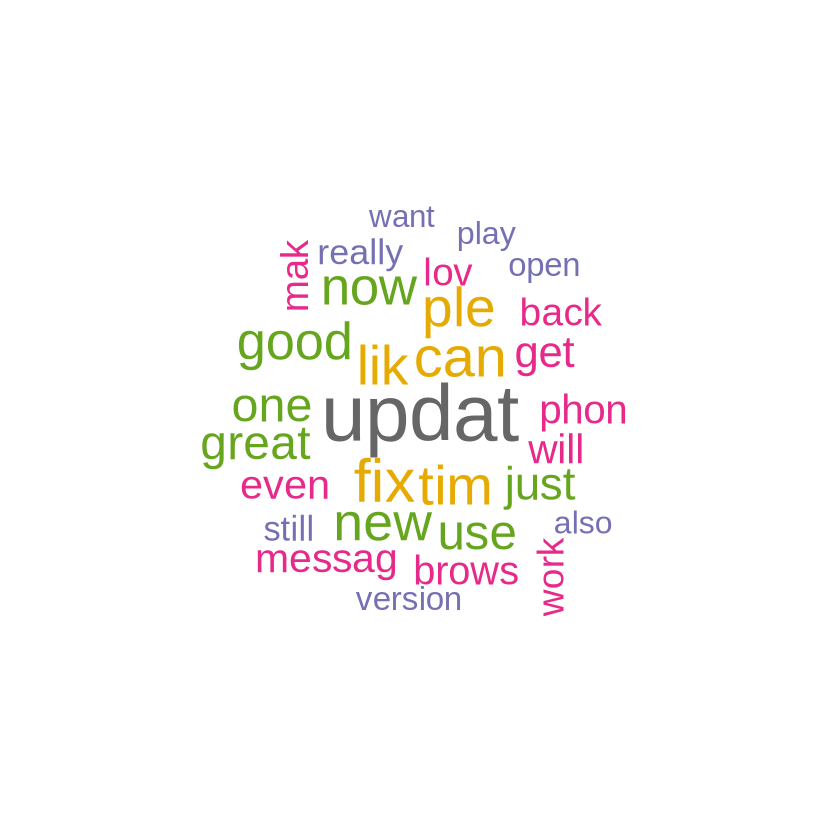

In [103]:
wordcloud(data_corpus_clean, max.words = 30, random.order = F, colors = brewer.pal(name = "Dark2", n = 8))

Puede apreciarse como la mayoria de palabras son o bien adjetivos o cuantificadores, a la vez que muhcas otras palabras que estan altamente relacionadas con el mundo de las aplicaciones, como la palabra update. Asi que para fijarme bien en que palabras son las que más influyen a la hora de otorgarle sentimiento a la review, realizare el mismo grafico para cada una de las categorias de polaridad.

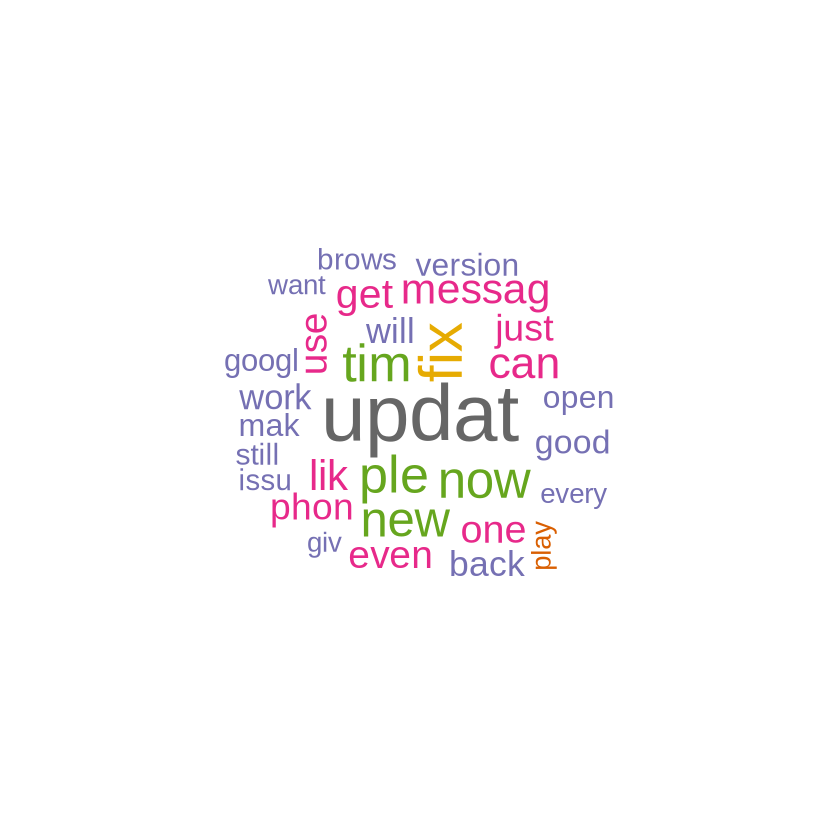

In [104]:
data_neutro = subset(data, data$polarity ==0)
data_corpus_neutro = VCorpus(VectorSource(data_neutro$review),readerControl = list(language = 'en'))
data_corpus_clean_neutro = clean_corpus(data_corpus_neutro) 

wordcloud(data_corpus_clean_neutro, max.words = 30, random.order = F, colors = brewer.pal(name = "Dark2", n = 8))

Sin sentimiento se observan palabras como actualizacion, arreglo, abierto...

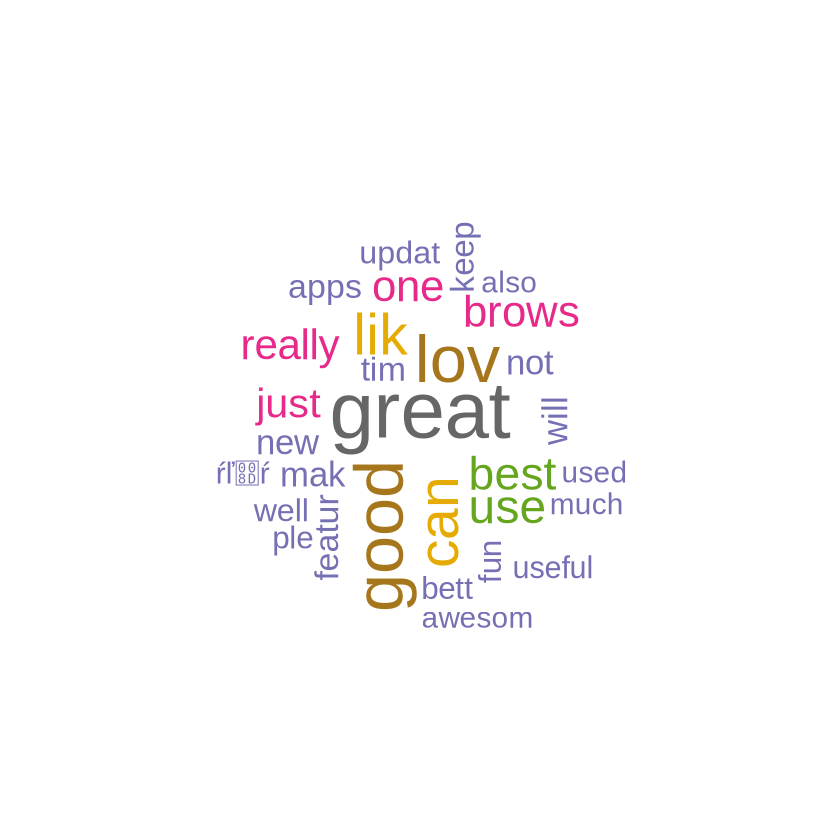

In [105]:
data_strong = subset(data, data$polarity ==1)
data_corpus_strong = VCorpus(VectorSource(data_strong$review),readerControl = list(language = 'es'))
data_corpus_clean_strong = clean_corpus(data_corpus_strong) 

wordcloud(data_corpus_clean_strong, max.words = 30, random.order = F, colors = brewer.pal(name = "Dark2", n = 8))

Las palabras con sentimiento se puede apreciar como son principalmente todos aquellos cuantificadores y adjetivos, tanto positivos como negativos.

Ahora transformare cada mensaje en palabras independientes para construir la estructura del análisis mediante una matriz.

In [300]:
dtm = DocumentTermMatrix(data_corpus_clean)
dtm

<<DocumentTermMatrix (documents: 891, terms: 3475)>>
Non-/sparse entries: 16846/3079379
Sparsity           : 99%
Maximal term length: 36
Weighting          : term frequency (tf)

In [94]:
str(dtm)

List of 6
 $ i       : int [1:16846] 1 1 1 1 1 1 1 1 1 1 ...
 $ j       : int [1:16846] 161 316 432 440 494 957 1023 1077 1596 1672 ...
 $ v       : num [1:16846] 1 1 1 1 1 1 1 1 1 1 ...
 $ nrow    : int 891
 $ ncol    : int 3475
 $ dimnames:List of 2
  ..$ Docs : chr [1:891] "character(0)" "character(0)" "character(0)" "character(0)" ...
  ..$ Terms: chr [1:3475] "ˇŕľ\u008dŕ" "ă\u0080\u008b" "â\u0098\u0086â\u0098\u0086â\u0098\u0086â\u0098\u0086â\u0098\u0086" "aafnaii" ...
 - attr(*, "class")= chr [1:2] "DocumentTermMatrix" "simple_triplet_matrix"
 - attr(*, "weighting")= chr [1:2] "term frequency" "tf"


Una vez he separado el mensaje en palabras independientes, voy a mirar que tanto se repiten.

In [119]:
termFreq = colSums(as.matrix(dtm))
head(termFreq)

ˇŕľ\u008dŕ 
                                                                1 
                                                    ă\u0080\u008b 
                                                                4 
â\u0098\u0086â\u0098\u0086â\u0098\u0086â\u0098\u0086â\u0098\u0086 
                                                                1 
                                                          aafnaii 
                                                                1 
                                                         aakhirat 
                                                                1 
                                                         aalikati 
                                                                1

In [120]:
tabla_frec = data.frame(term = names(termFreq), freq = termFreq)
head(tabla_frec)

,term,freq
,<chr>,<dbl>
ˇŕľŕ,ˇŕľŕ,1
ă,ă,4
âââââ,âââââ,1
aafnaii,aafnaii,1
aakhirat,aakhirat,1
aalikati,aalikati,1


Como vemos hay palabras que no tienen ningun tipo de sentido, para deshacerme de ellas seleccionaré solo todas aquellas palabras que hayan sido repetidas un numero significativo de veces, en este caso, 15.

In [122]:
tabla_frec <- tabla_frec[tabla_frec$freq >= 15, ]
head(tabla_frec)

,term,freq
,<chr>,<dbl>
able,able,48
account,account,25
add,add,40
ads,ads,55
allow,allow,15
almost,almost,23


In [123]:
tabla_frec = tabla_frec[order(-tabla_frec[,2]),]
head(tabla_frec)

,term,freq
,<chr>,<dbl>
updat,updat,233
fix,fix,170
can,can,159
tim,tim,153
lik,lik,151
ple,ple,150


Aqui vemos como la cosa ya cambia, con palabras repetidas mas de 200 veces vemos como el modelo realemente tendra de donde aprender. A continuación empezare con la creación del modelo predictor, partiendo los datos entre training y testing.

In [317]:
set.seed(555)

# Creamos el data partition de la función caret con un 70 - 30 split
inTrain <- createDataPartition(y = data$polarity
                                  , p = .70
                                  , list = FALSE
                                  , times = 1)
# Definitmos los datasets originales entre train y test
data_train<-data[inTrain,]
data_test<-data[-inTrain,]
# Revisamos el split
str(data_train)
str(data_test)

'data.frame':	624 obs. of  4 variables:
 $ package_name   : chr  "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" ...
 $ review         : chr  " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen"| __truncated__ " messenger issues ever since the last update, initial received messages don't get pushed to the messenger app a"| __truncated__ " profile any time my wife or anybody has more than one post and i view them it would take me to there profile s"| __truncated__ " the new features suck for those of us who don't have a working back button can you guys make the videos able t"| __truncated__ ...
 $ polarity       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ package_numeric: num  4 4 4 4 4 4 4 4 4 4 ...
'data.frame':	267 obs. of  4 variables:
 $ package_name   : chr  "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" ...
 $ review         : chr  " forced reload on

In [318]:
#data_corpus = VCorpus(VectorSource(data_train$review),readerControl = list(language = 'es'))
#data_corpus_clean_train = clean_corpus(data_corpus) 
#dtm_train = DocumentTermMatrix(data_corpus_clean_train)

#data_corpus2 = VCorpus(VectorSource(data_test$review),readerControl = list(language = 'es'))
#data_corpus_clean_test = clean_corpus(data_corpus2) 
#dtm_test = DocumentTermMatrix(data_corpus_clean_test)

corpus_train = data_corpus_clean[inTrain]
corpus_test  = data_corpus_clean[-inTrain]

# Y finalmente el Document term matrix
dtm_train = dtm[inTrain, ]
dtm_test  = dtm[-inTrain, ]

# Comprobamos que el desbalanceo de clases es el adecuado
print("Training")
round(prop.table(table(data_train$polarity))*100, 2)
print("Test")
round(prop.table(table(data_test$polarity))*100, 2)

[1] "Training"



    0     1 
66.19 33.81 

[1] "Test"



    0     1 
64.04 35.96 

Si nos fijamos, la distribucion del sentimiento de las reviews es bastante parecida entre training y testing lo cual es primordial para un buen modelo.

In [319]:
freq_terms = findFreqTerms(dtm_train, 15)
freq_terms

[1] "able"          "add"           "ads"           "almost"       
  [5] "also"          "always"        "andro"         "annoying"     
  [9] "anoth"         "anymor"        "anything"      "apps"         
 [13] "automatically" "avail"         "awesom"        "back"         
 [17] "background"    "bas"           "becom"         "best"         
 [21] "bett"          "big"           "brows"         "button"       
 [25] "call"          "can"           "chang"         "chat"         
 [29] "chrom"         "clos"          "com"           "connect"      
 [33] "connection"    "contacts"      "cool"          "crash"        
 [37] "dat"           "day"           "desktop"       "devic"        
 [41] "dont"          "downl"         "easy"          "edit"         
 [45] "error"         "even"          "ever"          "evernot"      
 [49] "every"         "everything"    "excellent"     "facebook"     
 [53] "fast"          "featur"        "fil"           "fin"          
 [57] "find"          "firefox"       "first"         "fix"          
 [61] "forc"          "fre"           "fun"           "galaxy"       
 [65] "get"           "getting"       "giv"           "going"        
 [69] "good"          "googl"         "got"           "great"        
 [73] "group"         "guys"          "hard"          "hat"          
 [77] "help"          "high"          "hop"           "howev"        
 [81] "ide"           "imag"          "improv"        "install"      
 [85] "inste"         "issu"          "just"          "keep"         
 [89] "keeps"         "keyboard"      "know"          "last"         
 [93] "latest"        "let"           "level"         "lik"          
 [97] "load"          "long"          "look"          "lot"          
[101] "lov"           "mad"           "mak"           "many"         
[105] "messag"        "messeng"       "mini"          "minut"        
[109] "mobil"         "money"         "much"          "need"         
[113] "needs"         "nepali"        "nev"           "new"          
[117] "news"          "nic"           "not"           "nothing"      
[121] "notification"  "notifications" "now"           "old"          
[125] "one"           "onlin"         "open"          "oper"         
[129] "option"        "options"       "pag"           "peopl"        
[133] "phon"          "pictur"        "play"          "playing"      
[137] "ple"           "plz"           "post"          "previous"     
[141] "problem"       "profil"        "rat"           "really"       
[145] "reinstall"     "ŕľ\u0087ŕ"     "ŕľ\u008dŕ"     "samsung"      
[149] "sav"           "say"           "says"          "scre"         
[153] "search"        "see"           "seems"         "send"         
[157] "servic"        "show"          "shows"         "sinc"         
[161] "slow"          "something"     "sometim"       "sound"        
[165] "spe"           "star"          "stars"         "start"        
[169] "status"        "still"         "stop"          "sucks"        
[173] "support"       "switch"        "tab"           "tablet"       
[177] "tak"           "text"          "thank"         "thanks"       
[181] "things"        "think"         "tim"           "top"          
[185] "tri"           "try"           "twitt"         "uninstall"    
[189] "updat"         "upgrad"        "use"           "used"         
[193] "useful"        "using"         "version"       "vib"          
[197] "vide"          "want"          "way"           "web"          
[201] "websit"        "wechat"        "well"          "whatsapp"     
[205] "widget"        "wifi"          "will"          "without"      
[209] "work"          "working"       "works"         "years"

In [320]:
#reduced_dtm_train = DocumentTermMatrix(data_corpus_clean_train, list(dictionary=freq_terms))
#reduced_dtm_test =  DocumentTermMatrix(data_corpus_clean_test, list(dictionary=freq_terms))

reduced_dtm_train = DocumentTermMatrix(corpus_train, list(dictionary=freq_terms))
reduced_dtm_test =  DocumentTermMatrix(corpus_test, list(dictionary=freq_terms))

#Revisamos cuantas columnas reducimos
ncol(dtm_train)
ncol(reduced_dtm_train)
ncol(dtm_test)
ncol(reduced_dtm_test)

[1] 3475

[1] 212

[1] 3475

[1] 212

Tras filtrar por los terminos mas frequentes nos quedamos con 212 terminos potencialmente influyentes.

In [321]:
convert_counts = function(x) {
  x = ifelse(x > 0, 1, 0)
  x = factor(x, levels = c(0, 1), labels=c("No", "Yes"))
  return (x)
}

# apply() allows us to work either with rows or columns of a matrix.
# MARGIN = 1 is for rows, and 2 for columns
reduced_dtm_train = apply(reduced_dtm_train, MARGIN=2, convert_counts)
reduced_dtm_test  = apply(reduced_dtm_test, MARGIN=2, convert_counts)

In [322]:
polarity_classifier = naiveBayes(reduced_dtm_train # Dataset de entrenamiento
                            , data_train$polarity) # Target de entrenamiento

polarity_test.predicted = predict(polarity_classifier,  # Predicciones utilizando el modelo creado con los datos de entrenamiento
                             reduced_dtm_test)

Aqui creo la funcion que se encargara de clasificar/predecir que sentimiento tiene una review.

In [290]:
length(polarity_test.predicted)
length(data_test$polarity)

[1] 267

[1] 267

Esta celda y la posterior fueron hehcas debido a que me estaba encontrando con un problema de tamaño y tipo de dato en el momento de crear la matriz de confusión y los usé para hacer debugging del problema y me ha hehco ilu dejarlo.

In [291]:
class(polarity_test.predicted)
class(data_test$polarity)

[1] "factor"

[1] "integer"

In [323]:
confusionMatrix(polarity_test.predicted, as.factor(data_test$polarity))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 135  30
         1  36  66
                                          
               Accuracy : 0.7528          
                 95% CI : (0.6966, 0.8034)
    No Information Rate : 0.6404          
    P-Value [Acc > NIR] : 5.574e-05       
                                          
                  Kappa : 0.4705          
                                          
 Mcnemar's Test P-Value : 0.5383          
                                          
            Sensitivity : 0.7895          
            Specificity : 0.6875          
         Pos Pred Value : 0.8182          
         Neg Pred Value : 0.6471          
             Prevalence : 0.6404          
         Detection Rate : 0.5056          
   Detection Prevalence : 0.6180          
      Balanced Accuracy : 0.7385          
                                          
       'Positive' Class : 0               
                              

El modelo predice correctamente 3/4 de las veces con una matriz de confusion con los falsos positivos y negativos distribuidos de forma bastante homogenea por lo que a priori no parece que tengamos una causa clara de estos errores.

In [260]:
data_test[(polarity_test.predicted != data_test$polarity) # Seleccionamos las instancias con error en la predicción
          & (data.test$polarity == 0),]

,package_name,review,polarity,package_numeric
,<chr>,<chr>,<int>,<dbl>
138,com.king.candycrushsaga,i love playing candy crush but... why when u go to another episode you have to wait for along time for example i was in level 50 and i passed it and had to wait 75 hours for episode 3 the game is good and very addictive but i don't like the waiting for the episodes đł by the way good đwork,0,10
154,com.king.candycrushsaga,complete bull was on 1186 and went to play and had lost all my boosters had over 100 different boosters saved up some i payed for never again,0,10
159,com.king.candycrushsaga,what the hell!! stole all my boosters! all my boosters and power ups are gone.. return it now.. had more than 60 of each! what a cheap manner to manage the game!! return all power ups nowww!!!!,0,10
180,com.imangi.templerun2,temple run -pretty good the game is fun.but i would like it if it didn't have so many videos for one specific app most of the time. it would also be nice if you could choose to be a boy or a girl character. overall the game is okay/pretty good,0,9
194,com.imangi.templerun2,not supported i am using panasonic t10 and frozen shadows are not supported. i will be very great full if you will fix this.,0,9
199,com.imangi.templerun2,temple run 2 frozen shadows i love this game so much i love being in the ice but only one thing that i hate about it is that the monster goes infront of u when your running but as you go further into the game it gets harder but able to pass the monster,0,9
216,com.supercell.clashofclans,sumpreme game but wizards take 8 min and hogs must be strongened i mean there are giants bombs and skeletons so why dont u incraese hogs abilities and pl make it we can use elixer and gold from walls lvl 8,0,16
245,com.android.chrome,this country not allowed? i would have given it 5 stars because my searches and browsing are spot on but it took me to back up account and when i put my backup e-mail in it said this country not allowed: im in america! wtf????,0,1
272,com.android.chrome,average not so good for watching online videos for watching videos i would prefer stock aosp google browser or uc browser + mx player.,0,1


In [264]:
data_test[(polarity_test.predicted != data_test$polarity) # Seleccionamos las instancias con error en la predicción
          & (data.test$polarity == 1),]

,package_name,review,polarity,package_numeric
,<chr>,<chr>,<int>,<dbl>
126,com.king.candycrushsaga,memory game the levels are so hard and less moves . l do no how to pass 95 levels but levels are so bour. chico bar is very hard to finish. please any of you send me life,1,10
177,com.imangi.templerun2,"really love the new game, but since this update the game keeps shutting down on my s5. please fix the glitch",1,9
224,com.supercell.clashofclans,"know how to get the account back. you have to delete clash of clans,then you download it again, then you look on the upper left corner of the screen, then you see already have a village?'' then you press it,then you will have your village.",1,16
233,com.supercell.clashofclans,"no longer a casual game the current version of the game makes it too hard to play casually anymore. expect to spend 4-6 hours a day, just to stay afloat.",1,16
256,com.android.chrome,totally loved it but....... how to open new tab in lollipop. in kitkat to open new tab we have to swipe down form up but after i updated my software i can't find it. plz reply fast,1,1
263,com.android.chrome,"the best i agree totally with the last poster. chrome is simply the best for android period. i've tried all the other crap out there and yeah they have some more features none of which i ever used. i have chrome on my laptop and pc and all of this is synced together. simple, direct and to the point and that's what i like and don't forget very fast.",1,1
351,com.viber.voip,viber s.a.r.l. this app helps me to stay in contact while also having video options and picture options. really nice app and pretty stable running. just a few video and audio issues as well as video and call drops which can be annoying. sometimes the app is unstable but is mostly attributed to network issues rather than the app itself. i recommend this app.,1,20
362,com.google.android.talk,"it's great when it works but right now it won't download any mms. it just says they're there and won't download them, and then loses the message when i switch to a different app to try to download it instead.",1,6
403,com.facebook.orca,"does what it says it does, but chat heads have limitations. the issue i have almost everyday is that when a conversation is open in a chat head, you can not paste what is copied to your clipboard. everything is works fine enough.",1,5


Aqui se observan los falsos positivos y negativos de las prediccionesvy a priori no es facil observar una causa para estos fallos.

Aqui escribire lo que seria todo el codigo seguido.

In [265]:
data_subject_eC = read.csv(file='sentiment_dataset.csv', header=TRUE, sep=',', dec='.')

data_corpus_eC = VCorpus(VectorSource(data_subject_eC$review),readerControl = list(language = 'en'))

data_corpus_clean_eC = clean_corpus(data_corpus_eC) 

In [266]:
dtm_eC = DocumentTermMatrix(data_corpus_clean_eC)

In [267]:
reduced_dtm_eC_predict = apply(dtm_eC, MARGIN=2, convert_counts)

In [268]:
subject_test.predicted = predict(polarity_classifier,  # Predicciones utilizando el modelo creado con los datos de entrenamiento
                             reduced_dtm_eC_predict)

In [269]:
round(prop.table(table(subject_test.predicted))*100, digits = 1)

subject_test.predicted
   0    1 
61.4 38.6 

In [270]:
data_subject_eCpredict=cbind(data_subject_eC,subject_test.predicted)
data_subject_eCpredict_s <- subset(data_subject_eCpredict, subject_test.predicted ==0) 
tail(data_subject_eCpredict_s)

,package_name,review,polarity,subject_test.predicted
,<chr>,<chr>,<int>,<fct>
873,com.rovio.angrybirds,"the best game about they dont call this the no.1 app for nothing, its the original and best clean game about. one needs to work out how best to strike the piggy structures by flinging the birds in a sling (funny though, i thought they had wings). it is a wonderful novel idea for a game and will no doubt will continue to appeal to a wide audience for some time to come! (it's as big as what the old lemmings game was in the 1990s) it's so addictive and fun to play whilst having a good feel about it. for me beats angry birds 2 game very easily and will no doubt remain so for the near future. the only flaw in it is loads of adds and becomes so slow when connected to the internet, but thankfully, the in game adds can be binned for a small fee but it also plays fine offline.",1,0
878,com.rovio.angrybirds,"game glitches nice, you have all the cheesy, simple reviews right up first. hey, robin!! i was nearly completed the game and i had to uninstall/reinstall, losing all my achievements. and it's still freezing up. it even switches to one if those annoying :30 ads in the middle of a game. is there a reason why my game was working just fine until the update?",0,0
883,com.rovio.angrybirds,ads way to many ads can't even enjoy the game with the amount of ads i have to watch. every other level there's an ad. that's just ridiculous.,0,0
886,com.rovio.angrybirds,too many ads far more adverts than any other game i've played. i know it's free and they need the ads to make a profit but there needs to be a balance.,1,0
888,com.rovio.angrybirds,all time legendary game the birthday party levels and short fuse levels are fantastic.especially when the pigs crash onto different chemicals is just great.suggestion to all those players who cringe about too much ads is close ur wi-fi connection and then play the game.then the ads won't trouble you.,1,0
889,com.rovio.angrybirds,"ads are way to heavy listen to the bad reviews. there are ads after every round, whether you pass it or fail it. sometimes there are ads before the next round starts to. you spend more time on ads than game play. i develop web apps, and honestly many people rely on ads to make a living. i can appreciate that all to well. however, these developers have went far beyond that. frankly, they are disrespectful nitwits.",0,0


A continuacion usaré laplace smoothing para tratar de optimizar el modelo

### MEJORA DEL MODELO - Laplace Smoothing


In [272]:
for (i in (1:10))
{
    print(paste0("Laplace factor of ", as.character((i-1)/4)))
    sms_classifier2 = naiveBayes(reduced_dtm_train, 
                                 data_train$polarity,
                                 laplace = (i-1)/4)
    
    sms_test.predicted2 = predict(sms_classifier2,
                                  reduced_dtm_test)
    
    print(confusionMatrix(sms_test.predicted2, as.factor(data_test$polarity)))
}

[1] "Laplace factor of 0"
Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 135  30
         1  36  66
                                          
               Accuracy : 0.7528          
                 95% CI : (0.6966, 0.8034)
    No Information Rate : 0.6404          
    P-Value [Acc > NIR] : 5.574e-05       
                                          
                  Kappa : 0.4705          
                                          
 Mcnemar's Test P-Value : 0.5383          
                                          
            Sensitivity : 0.7895          
            Specificity : 0.6875          
         Pos Pred Value : 0.8182          
         Neg Pred Value : 0.6471          
             Prevalence : 0.6404          
         Detection Rate : 0.5056          
   Detection Prevalence : 0.6180          
      Balanced Accuracy : 0.7385          
                                          
       'Positive' Class : 0               
    

El mejor modelo lo conseguimos con un factor de laplace de 0.75, sin embargo, solo mejoramos hasta el 76% de precision por lo que no es una gran mejora.

### Conclusiones

Tras la realización de este proyecto hemos observado el como deben tratarse los datos de unas reviews para quedarnos con las raizes de las palabras importantes y deshacernos de aquellas palabras que no nos aporten información. Una vez teniamos estos datos tratados ha todado visualizar que palabras eran las mas importantes para ver si necesitabamos algun tratamiento extra. 

Tras esto, ha tocado partir los datos por training y testing y prepararlos para poder crear el modelo clasificador de Naive Bayes, una vez creados hemos obtenido un 75% de precision que he sido capaz de mejorar hasta el 0.76 con un factor de laplace de 0.75. He mirado las clasificaciones erroneas y a priori no he podido ver errores claros, sin embargo lo que si se veia era que aquellas aplicaciones en las que habia errores se repetian bastanet, como clash of clans, slack o candy crush por lo que seguramente aquellas aplicaciones en las que predice correctamente la precision del modelo sera bastante mas alta.

Proximos pasos podrian ser el generar las precisiones para cada apliacion de forma individual para ver si con algunas de las apps tenemos un modelo con mas fiabilidad y para mejorar la prediccion siempre irian bien más datos, y no solo usar las reviews, sino tambien las puntuaciones que los usuarios le han dado a la aplicacion, de este modo tambien seriamos capaces de distinguir entre reviews positivas y negativas, asi obtendriamos un mayor grado de profundidad en el analisis.